In [7]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud, ImageColorGenerator

In [8]:
#데이터 로드
df = pd.read_csv('National Museum of Korea_tripadvisor.csv')
df

,Unnamed: 0,NAME,STAR,REVIEW,DATE
0,0,Learntorock,4.0,"A large, well organised museum that was worth ...","Written July 14, 2022"
1,1,lostinatlanta,3.0,"This place is massive, the first floor has ite...","Written July 13, 2022"
2,2,carina,3.0,This museum is well laid out and it is nice. T...,"Written June 26, 2022"
3,3,Gombung,4.0,very impressive! it shows the 5000 year old ko...,"Written June 21, 2022"
4,4,Traveltheorient,5.0,One of the most spectacular museums I have eve...,"Written June 11, 2022"
...,...,...,...,...,...
1295,1295,1Q,5.0,"Once you intended to visit this place, then yo...","Written May 26, 2012"
1296,1296,gipsy2,5.0,"An amazing building full of interesting facts,...","Written May 23, 2012"
1297,1297,darcforest,4.0,This place is huge and takes a long time to go...,"Written May 22, 2012"
1298,1298,GirlWithPearl,5.0,one or two days a week open until 21! Lot to s...,"Written May 18, 2012"


In [11]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
#워드카운트를 위해 String 형태로 전환
review_str= ' '.join(list(df['REVIEW'])).lower()
review_str[:500]
for i in review_str:
    i=stemmer.stem(i)

In [12]:
#필요한 패키지 임포트 및 다운로드
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
#불용어 확인
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [14]:
#불용어 추가
stop_words = set(stopwords.words('english'))
add_stop_words = ["'", ",", "'s", ":", ".", "?", "!"]
for word in add_stop_words:
    stop_words.add(word)

In [15]:
#리뷰들을 토큰화 & 불용어제거
word_tokens = word_tokenize(review_str)
review_list = [] #리스트 형태 하나와 
review = '' #스트링 형태 하나를 만듦.
#for w in word_tokens: 
for w in word_tokens:
    if w not in stop_words: 
        review_list.append(w)
        review = review + ' ' + w

In [16]:
print("불용어 개수 : ", len(stop_words))
print("불용어 처리 전 : ", len(review_str))
print("불용어 처리 후 : ", len(review_list))
print("불용어 처리로 약 ", round(100-len(review_list)/len(review_str)*100, 1),"% 감소")

불용어 개수 :  186
불용어 처리 전 :  453269
불용어 처리 후 :  43111
불용어 처리로 약  90.5 % 감소


In [ ]:
#stemmer = nltk.stem.SnowballStemmer('english')
 #   stemmer_words = [stemmer.stem(word) for word in no_stops]

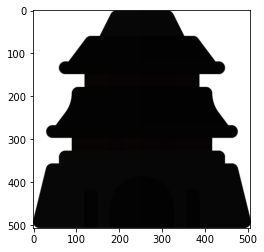

In [31]:
#마스크이미지 업로드 & 워드클라우드 만들기
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt
mask = np.array(Image.open("ndm.png"))
plt.imshow(mask)

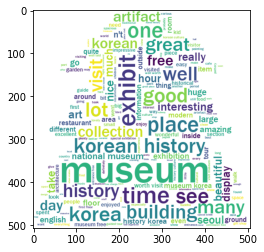

In [32]:
wc_review = WordCloud(background_color='white', font_path='framd.ttf',mask=mask).generate(review)
plt.imshow(wc_review)

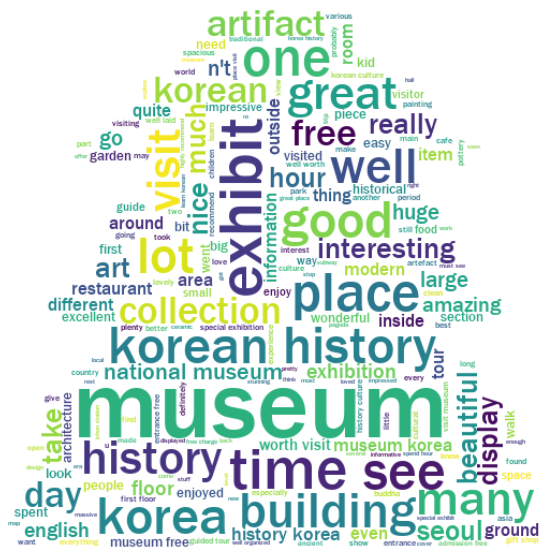

In [34]:
fig = plt.figure(figsize=(10, 10))#figsize=(10, 10))
plt.imshow(wc_review,interpolation="bilinear")#interpolation="bilinear"
plt.axis("off")
plt.show()